#Importando data

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import perf_counter
inicio=perf_counter()

In [61]:
datos = pd.read_csv('/content/df_consolidado.csv')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   precio    197 non-null    int64  
 1   uva       197 non-null    float64
 2   dia       197 non-null    int64  
 3   mes       197 non-null    int64  
 4   ano       197 non-null    int64  
 5   decena_1  197 non-null    int64  
 6   decena_2  197 non-null    int64  
 7   decena_3  197 non-null    int64  
 8   tri_1     197 non-null    int64  
 9   tri_2     197 non-null    int64  
 10  tri_3     197 non-null    int64  
 11  tri_4     197 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 18.6 KB


In [62]:
#elimino las últimas filas que no quiero mostrarle para que entrene
indices_a_eliminar = datos.index[-40:]
df = datos.drop(indices_a_eliminar)
#y elimino las columnas que no necesito
df=df.drop(['dia','mes','ano'],axis=1)

#Análisis exploratorio

In [63]:
df.describe().round(2)

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
count,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00
mean,1268.25,1056.30,0.36,0.30,0.34,0.05,0.30,0.57,0.08
std,119.33,126.75,0.48,0.46,0.47,0.22,0.46,0.50,0.28
min,955.00,463.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1210.00,1019.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1260.00,1079.79,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,1345.00,1137.82,1.00,1.00,1.00,0.00,1.00,1.00,0.00
max,1480.00,1201.59,1.00,1.00,1.00,1.00,1.00,1.00,1.00


<Axes: ylabel='precio'>

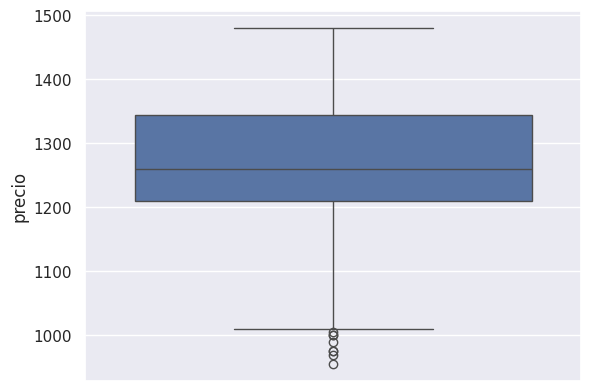

In [64]:
sns.boxplot(data=df['precio'])

In [65]:
df[df['precio'] < 1000]

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
0,955,463.0,1,0,0,1,0,0,0
4,975,716.0,0,1,0,1,0,0,0
7,990,770.0,0,0,1,1,0,0,0
8,975,786.0,1,0,0,0,1,0,0
9,970,828.0,1,0,0,0,1,0,0


In [66]:
#puedo eliminar data por debajo de 1000, que son 5 rows... ver esto...
#df=df[df.precio > 1000]

#Correlaciones

In [67]:
df.cov().round(2)

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
precio,14239.70,7235.11,-7.92,3.73,4.18,-11.77,-19.28,38.92,-7.87
uva,7235.11,16065.63,-2.90,3.30,-0.40,-20.71,-22.85,32.06,11.50
decena_1,-7.92,-2.90,0.23,-0.11,-0.12,0.00,-0.01,-0.02,0.03
decena_2,3.73,3.30,-0.11,0.21,-0.10,0.00,-0.01,0.02,-0.01
decena_3,4.18,-0.40,-0.12,-0.10,0.23,-0.00,0.03,0.01,-0.03
tri_1,-11.77,-20.71,0.00,0.00,-0.00,0.05,-0.02,-0.03,-0.00
tri_2,-19.28,-22.85,-0.01,-0.01,0.03,-0.02,0.21,-0.17,-0.02
tri_3,38.92,32.06,-0.02,0.02,0.01,-0.03,-0.17,0.25,-0.05
tri_4,-7.87,11.50,0.03,-0.01,-0.03,-0.00,-0.02,-0.05,0.08


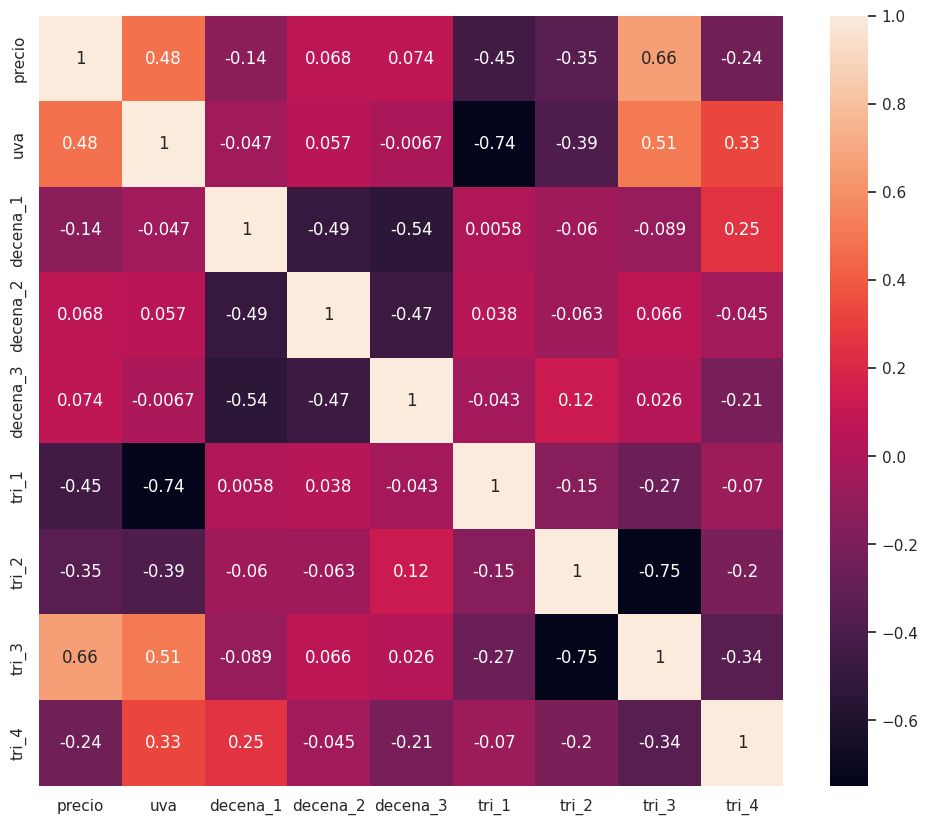

In [68]:
#ESTO ES PARA VER LA CORRELACION ENTRE LAS VARIABLES:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

#Escalamiento
* ver si es conveniente utilizar StandardScaler

* y me resulta conveniente ya quitar la dimension precio

In [69]:
#PRIMERO creo una copia y elimino la columna precio

df_a_scaled = df.copy()
df_a_scaled = df_a_scaled.drop('precio', axis=1)

In [70]:
from sklearn import preprocessing
# Crear una instancia de MinMaxScaler
scaler = preprocessing.MinMaxScaler()
# Ajustar el scaler a los datos
scaler.fit(df_a_scaled)

MinMaxScaler()

In [71]:
# Transformar los datos usando el scaler ajustado
df_scaled = scaler.transform(df_a_scaled)
# Convertir el ndarray escalado de nuevo a DataFrame
df_scaler = pd.DataFrame(df_scaled, columns=df_a_scaled.columns)

In [72]:
df_scaler

,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.083944,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.132685,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.293803,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.342545,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
152,0.995546,1.0,0.0,0.0,0.0,0.0,0.0,1.0
153,0.997766,1.0,0.0,0.0,0.0,0.0,0.0,1.0
154,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
155,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [73]:
df_scaler.describe().round(2)

,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
count,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00
mean,0.80,0.36,0.30,0.34,0.05,0.30,0.57,0.08
std,0.17,0.48,0.46,0.47,0.22,0.46,0.50,0.28
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.84,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.91,1.00,1.00,1.00,0.00,1.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#PCA - análisis de componentes principales

In [74]:
#sns.pairplot(df_scaler)

In [75]:
from sklearn.decomposition import PCA

##Ahora tengo que evaluar con cuantas dimensiones optimizo mejor

In [76]:
#itero con las 8 dimensiones
lista=[]
for i in range(1,9):
  pca = PCA(n_components=i) #creo una instancia y le paso a cuantos componentes quiero reducir mi matriz
  pca.fit(df_scaler) #y que lo entrene con los datos escalados
  data=pd.DataFrame(pca.explained_variance_ratio_)
  lista.append(data[0].sum())


In [77]:
lista

[0.3246794853604342,
 0.6101176606576157,
 0.8515732240093127,
 0.9366653638056207,
 0.9974961624467362,
 1.0,
 1.0,
 1.0]

<Axes: >

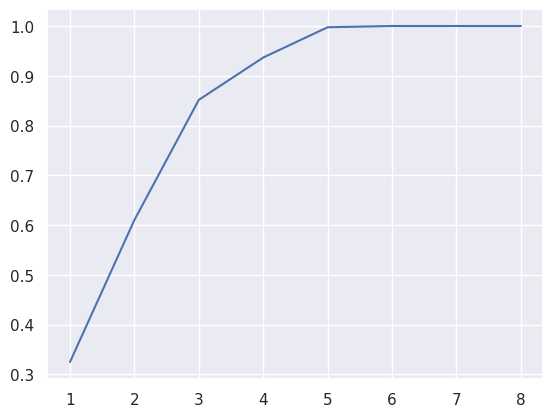

In [78]:
sns.set(style='darkgrid')
sns.lineplot(x=range(1,9),y=lista)

In [79]:
#Con 4 dimensiones esta por encima del 94.46%, tomamos esta opción.
pca = PCA(n_components=4) #creo una instancia y le paso a cuantos componentes quiero reducir mi matriz
# pca = PCA(n_components=0.95)  # Esto captura el 95% de la varianza
pca.fit(df_scaler) #y que lo entrene con los datos escalados

PCA(n_components=4)

In [80]:
#El PCA tiene varios metodos:
pca.explained_variance_ratio_
# el array obtenido: ([0.37320186, 0.28152698, 0.21422958, 0.09677119]) --> me dice las direcciones principales son estas, y que % de los datos capturan --> en este ejemplo son 4
# estamos por encima del 90% lo cual es decente

array([0.32467949, 0.28543818, 0.24145556, 0.08509214])

## Ahora rearmo el df

In [81]:
X_pca = pca.transform(df_scaler) #transformo el conjunto de datos escalado para obtener los componentes principales.

In [82]:
#Crear un nuevo DataFrame: Aunque los componentes no tienen nombres específicos, puedes crear un nuevo DataFrame y asignar nombres genéricos como PC1, PC2, etc.
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]) # X_pca.shape[1] --> es la cantidad de columnas

In [83]:
df_pca['precio'] = df['precio'].values #le sumo la variable objetivo

In [84]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     157 non-null    float64
 1   PC2     157 non-null    float64
 2   PC3     157 non-null    float64
 3   PC4     157 non-null    float64
 4   precio  157 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.3 KB


In [85]:
df_pca.head(3)

,PC1,PC2,PC3,PC4,precio
0,-0.458324,0.780861,-0.136354,0.390480,955
1,-0.431013,-0.585479,-0.324838,0.700148,1205
2,-0.440355,0.781359,-0.140438,0.394824,1165


# Modelo

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [87]:
X = df_pca.drop('precio', axis=1)  # Eliminar la columna 'precio'
y = df_pca['precio']  # La variable objetivo

In [88]:
# Divido los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Testeo modelo

In [90]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test).round(5)

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 8606.358880279615


In [92]:
mse**0.5

92.77046340446735

##Validacion cruzada

In [93]:
#VALIDACION CRUZADA
from sklearn.model_selection import cross_val_score #para realizar validacion cruzada
val_cruz_lr=cross_val_score(model, X_train, y_train, cv=5)#.mean().round(5)
print(f'El resultado de validacion cruzada de lr es: {val_cruz_lr}')

El resultado de validacion cruzada de lr es: [0.31778593 0.5146172  0.33541211 0.34169808 0.41045297]


#Rearmado del df con todas las predicciones

In [94]:
#Armo el df con la prediccion en cada instancia:
df['precio_lr'] = model.predict(X)
df['diferencia']=df['precio']-df['precio_lr'] #genero la variable diferencia
df['abs_dif_lr']=abs(df['diferencia']) #tomo el valor absoluto de la diferencia
df['desvio%_lr']=df['abs_dif_lr']/df['precio'] #para luego generar la diferencia %
df=df.drop(['diferencia'],axis=1) #elimino la variable diferencia que ya no la uso porque tengo el abs

# Análisis de resultados

In [95]:
df[['precio','precio_lr']]

,precio,precio_lr
0,955,1158.717448
1,1205,1162.141930
2,1165,1160.125867
3,1020,1161.836090
4,975,1163.606318
...,...,...
152,1155,1111.673065
153,1155,1111.696634
154,1160,1112.973197
155,1160,1112.973197


In [96]:
df.describe().round(2)

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4,precio_lr,abs_dif_lr,desvio%_lr
count,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00,157.00
mean,1268.25,1056.30,0.36,0.30,0.34,0.05,0.30,0.57,0.08,1269.89,71.13,0.06
std,119.33,126.75,0.48,0.46,0.47,0.22,0.46,0.50,0.28,81.07,53.96,0.05
min,955.00,463.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1111.49,0.98,0.00
25%,1210.00,1019.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1203.75,26.72,0.02
50%,1260.00,1079.79,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1335.77,63.42,0.05
75%,1345.00,1137.82,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1337.91,98.06,0.08
max,1480.00,1201.59,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1339.57,230.54,0.24


In [97]:
from sklearn.metrics import max_error
max_error(df['precio'], df['precio_lr'])

230.53968437688923

In [98]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['precio'], df['precio_lr'])

71.12925541996105

In [99]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['precio'], df['precio_lr'])

7952.601341559112

In [100]:
mean_squared_error(df['precio'], df['precio_lr'],squared=False) #rmse

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


89.17735890661436

In [101]:
mean_squared_error(df['precio'], df['precio_lr'])*(len(df['precio_lr'])) #Suma de los cuadrados de los residuos (RSS)

1248558.4106247807

In [102]:
from sklearn.metrics import r2_score
r2_score(df['precio'], df['precio_lr']) # coeficiente de determinacion, indica que es un buen modelo en general arriba de 75% , excelente arriba de los 80%
## y casi perfecto por arriba de los 90%
### 100% es que todos los valores son predichos exactos, y es bueno evaluar si esta sobreajustado.

0.437939061118637

#Graficas finales

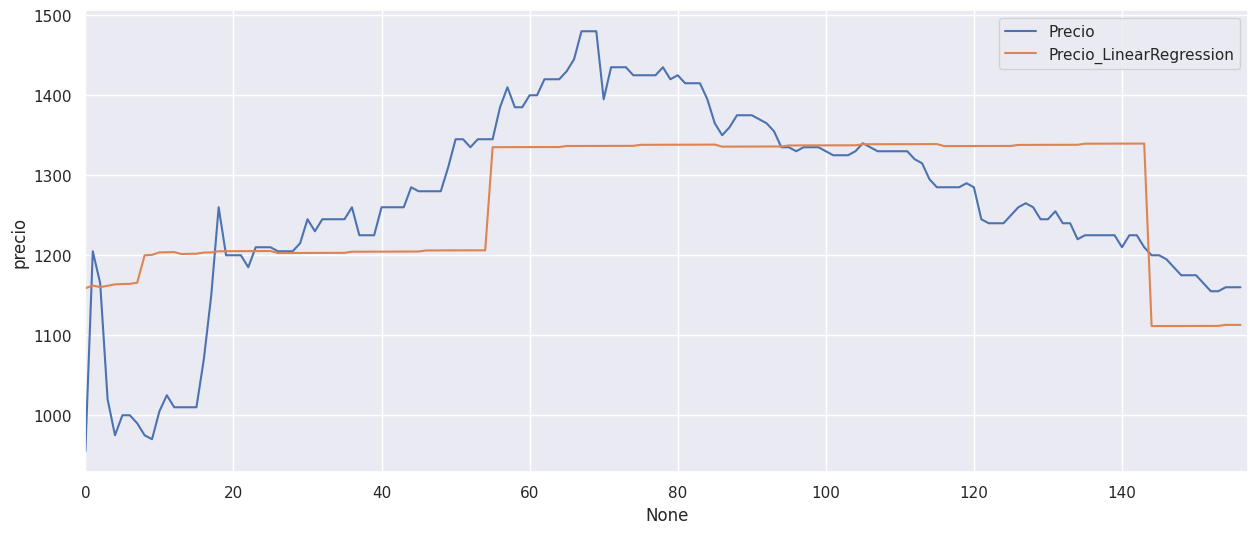

In [103]:
plt.figure(figsize=(15, 6))
sns.set(style='darkgrid')
sns.lineplot(data=df, x=df.index, y='precio', label='Precio')
sns.lineplot(data=df, x=df.index, y='precio_lr', label='Precio_LinearRegression')
plt.xlim(0, len(df)) #ajustará el eje x para mostrar todos los puntos de datos.
#plt.xlim(inicio_x, fin_x)  # Ajusta 'inicio_x' y 'fin_x' a tus necesidades
plt.show()

#Evaluando el modelo con datos que no vio el modelo
** son las últimas filas que no estaban en el train del model

Verificar: objetos scaler, pca y model --> que esten creados y entrenados.

##Nuevos datos a predecir

In [104]:
#me quedo con las filas que no estan en el entrenamiento
rows_a_eliminar = datos.index[:-40]
datos_a_predecir = datos.drop(rows_a_eliminar)
#y elimino las columnas que no necesito
datos_a_predecir=datos_a_predecir.drop(['dia','mes','ano'],axis=1)
datos_a_predecir.head(3)

,precio,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4
157,1160,1201.59,0,1,0,0,0,0,1
158,1170,1208.20,0,1,0,0,0,0,1
159,1215,1209.85,0,1,0,0,0,0,1


In [105]:
df_predict = datos_a_predecir.drop('precio', axis=1)
precios_datos = datos_a_predecir['precio']

In [106]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 157 to 196
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   uva       40 non-null     float64
 1   decena_1  40 non-null     int64  
 2   decena_2  40 non-null     int64  
 3   decena_3  40 non-null     int64  
 4   tri_1     40 non-null     int64  
 5   tri_2     40 non-null     int64  
 6   tri_3     40 non-null     int64  
 7   tri_4     40 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 2.6 KB


##Calculo

In [107]:
def predecir_precio(df_predict, scaler, pca, model):

    # Escalar los nuevos datos
    nuevos_datos_scaled = scaler.transform(df_predict)

    # Transformar los datos escalados usando PCA
    nuevos_datos_pca = pca.transform(nuevos_datos_scaled)

    # Predecir el precio
    precio_predicho = model.predict(nuevos_datos_pca)

    return precio_predicho

In [108]:
# Llamar a la función para predecir el precio
precio_predicho = predecir_precio(df_predict, scaler, pca, model)

# Imprimir el precio predicho
print(f"El precio predicho es: {precio_predicho}")

El precio predicho es: [1112.97319698 1113.06819338 1113.09190655 1113.11130824 1113.13056621
 1113.1499679  1113.1499679  1114.43055975 1114.48876481 1114.5081665
 1114.52756818 1114.54711359 1114.54711359 1114.54711359 1114.54711359
 1114.56665899 1114.56665899 1114.62515148 1114.664386   1112.15063374
 1112.17032286 1112.17032286 1112.17032286 1112.22939022 1112.24907934
 1112.24907934 1112.28860129 1112.30843413 1112.30843413 1113.56128365
 1113.64075871 1113.70054464 1113.70054464 1113.70054464 1113.70054464
 1113.76464207 1115.06118642 1115.07728263 1115.09337885 1115.09337885]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Resultados

In [109]:
df_predict['precio_real']=datos_a_predecir['precio']
df_predict['precio_predicho']=precio_predicho
df_predict['diferencia_abs']=abs(df_predict['precio_real']-df_predict['precio_predicho'])
df_predict

,uva,decena_1,decena_2,decena_3,tri_1,tri_2,tri_3,tri_4,precio_real,precio_predicho,diferencia_abs
157,1201.59,0,1,0,0,0,0,1,1160,1112.973197,47.026803
158,1208.20,0,1,0,0,0,0,1,1170,1113.068193,56.931807
159,1209.85,0,1,0,0,0,0,1,1215,1113.091907,101.908093
160,1211.20,0,1,0,0,0,0,1,1200,1113.111308,86.888692
161,1212.54,0,1,0,0,0,0,1,1200,1113.130566,86.869434
162,1213.89,0,1,0,0,0,0,1,1205,1113.149968,91.850032
163,1213.89,0,1,0,0,0,0,1,1205,1113.149968,91.850032
164,1213.89,0,0,1,0,0,0,1,1205,1114.430560,90.569440
165,1217.94,0,0,1,0,0,0,1,1220,1114.488765,105.511235
166,1219.29,0,0,1,0,0,0,1,1225,1114.508166,110.491834


##Metricas

In [110]:
a=max_error(df_predict['precio_real'], df_predict['precio_predicho'])
b=mean_absolute_error(df_predict['precio_real'], df_predict['precio_predicho'])
c=mean_squared_error(df_predict['precio_real'], df_predict['precio_predicho'])
d=mean_squared_error(df_predict['precio_real'], df_predict['precio_predicho'],squared=False) #rmse
print(a,b,c,d)

110.49183350259182 47.1399367340874 3844.414236038848 62.00334052322381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#Datos futuros a saber

In [111]:
datos_futuro = [[1279.17,0, 1, 0, 0, 0, 0, 1]] #ejemplo con valor uva del banco central fecha 10/12/24 -->array([1120.])

In [112]:
predecir_precio(datos_futuro, scaler, pca, model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1114.08814722])

# Tiempo del proceso

Utilizamos test_counter

In [113]:
final=perf_counter()
print(final-inicio)

4.064634878999868
